# Information Retrieval

Traditionally, information retrieval (IR) has been a key area in computer science, focusing on finding relevant documents from large collections based on user queries. The most common and time-tested method is `keyword search`, where documents are indexed based on the words they contain. When a user inputs a query, the system retrieves documents that match the keywords in the query.

In the age of large language models (LLMs), the landscape of IR is evolving. LLMs can understand and generate human-like text, allowing for more sophisticated interactions. Instead of just matching keywords, LLMs can comprehend the `context and semantics` of a query, leading to more relevant and nuanced results.

## Search Techniques




![Search Techniques](./resource/search_technique.png)

*Screenshot from the course showing different search techniques including keyword search and semantic search with metadata filtering*


## TF-IDF
TF-IDF, or Term Frequency-Inverse Document Frequency, is a statistical measure used to evaluate the importance of a word in a document relative to a collection of documents (corpus). It combines two components:

- `Term Frequency (TF)`: Measures how frequently a term appears in a document. The more a term appears, the more relevant it is considered to be for that document.
- 
- `Inverse Document Frequency (IDF)`: Measures how important a term is across the entire corpus. A term that appears in many documents is less informative than a term that appears in only a few. IDF is calculated as the logarithm of the total number of documents divided by the number of documents containing the term.
- 
- The final TF-IDF score is the product of these two components, providing a balanced measure of a term's relevance in a specific document relative to the entire corpus.

### How to calculate TF-IDF:
```math
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
```
Where:
- `t` is the term,

- `d` is the document,

- `TF(t, d)` is the term frequency of term `t` in document `d`, calculated as:
```math
\text{TF}(t, d) = \frac{\text{Number of times term } t \text{ appears in document } d}{\text{Total number of terms in document } d}
```
- `IDF(t)` is the inverse document frequency of term `t`, calculated as:
```math
\text{IDF}(t) = \log\left(\frac{\text{Total number of documents in corpus}}{\text{Number of documents containing term } t}\right)
```

- The TF-IDF score is higher for terms that are frequent in a document but rare across the corpus, making it a powerful tool for identifying relevant documents in information retrieval tasks.

For example, if we have a document containing the term "AI" 5 times out of 100 total terms, and "AI" appears in 10 out of 1000 documents in the corpus, the TF-IDF score for "AI" in that document would be calculated as follows:
```math
\text{TF-IDF}(\text{"AI"}, d) = \left(\frac{5}{100}\right) \times \log\left(\frac{1000}{10}\right) = 0.05 \times \log(100) = 0.05 \times 2 = 0.1
```
In comparison, if another term "ML" appears 2 times in the same document and is present in 100 out of 1000 documents, its TF-IDF score would be:
```math
\text{TF-IDF}(\text{"ML"}, d) = \left(\frac{2}{100}\right) \times \log\left(\frac{1000}{100}\right) = 0.02 \times \log(10) = 0.02 \times 1 = 0.02
```
This shows that "AI" is more relevant to the document than "ML" based on the TF-IDF scores, highlighting its importance in the context of the document and the corpus.



## BM25
BM25, or Best Matching 25, is an advanced ranking function used in information retrieval that builds upon the TF-IDF model. It incorporates several enhancements to improve the relevance of search results:
- `Term Frequency Saturation`: Unlike TF-IDF, BM25 applies a saturation effect to term frequency, meaning that the relevance of a term increases with its frequency but at a diminishing rate. This prevents overly frequent terms from disproportionately influencing the score.

- `Document Length Normalization`: BM25 normalizes the term frequency by considering the length of the document. This helps to ensure that longer documents do not unfairly receive higher scores simply due to their length.

- `IDF Component`: BM25 uses a modified version of the IDF component, which is more robust against terms that appear in many documents. It adjusts the IDF calculation to better reflect the rarity of a term across the corpus.

### Advantages of BM25:

- `Improved Relevance`: By combining term frequency saturation and document length normalization, BM25 provides more accurate relevance scores compared to traditional TF-IDF.

- `Flexibility`: BM25 allows for tuning parameters (`k_1` and `b`) that can be adjusted based on the specific characteristics of the corpus, making it adaptable to different types of documents and queries.

- `Widely Used`: BM25 is a standard in information retrieval and is implemented in many search engines and libraries, making it a reliable choice for building search systems.


![BM25](./resource/BM25.jpg)
*Screenshot from the course showing the BM25 formula and its components*

### How to calculate BM25:
```math
\text{BM25}(t, d) = \text{IDF}(t)\times \frac{\text{TF}(t, d) \times (k_1 + 1)}{\text{TF}(t, d) + k_1 \times (1 - b + b \times \frac{\text{Length}(d)}{\text{Avg.Length}})}
```

Where:
- `t` is the term,

- `d` is the document,

- `TF(t, d)` is the term frequency of term `t` in document `d`,

- `IDF(t)` is the inverse document frequency of term `t`, calculated as:
```math
\text{IDF}(t) = \log\left(\frac{\text{Total number of documents in corpus} - \text{Number of documents containing term } t + 0.5}{\text{Number of documents containing term } t + 0.5}\right)
```
- `k_1` and `b` are tuning parameters that control the term frequency saturation and document length normalization, respectively. Common values are `k_1 = 1.2` and `b = 0.75`.


BM25 is particularly effective in scenarios where the relevance of documents needs to be assessed based on both the frequency of terms and the overall structure of the documents. It is widely used in search engines and information retrieval systems due to its ability to provide more accurate and relevant results compared to traditional TF-IDF methods.



### Python Implementation of BM25


In [1]:
!pip install rank_bm25 nltk

  Obtaining dependency information for rank_bm25 from https://files.pythonhosted.org/packages/2a/21/f691fb2613100a62b3fa91e9988c991e9ca5b89ea31c0d3152a3210344f9/rank_bm25-0.2.2-py3-none-any.whl.metadata


In [4]:
from rank_bm25 import BM25Okapi
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from nltk import download
download('punkt') #punkt is used for tokenization
download('stopwords') #stopwords are used for filtering out common words
# Sample documents
documents = [
    "The cat sat on the mat.",
    "The dog sat on the log.",
    "Cats and dogs are great pets.",
    "Dogs are loyal and friendly.",
    "Cats are independent and curious."
]
# Preprocess documents: tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_docs = []
for doc in documents:       
    tokens = word_tokenize(doc.lower())  # Tokenize and convert to lowercase
    tokens = [word for word in tokens if word not in stop_words and word not in string.punctuation]  # Remove stopwords and punctuation
    tokenized_docs.append(tokens)
# Initialize BM25
bm25 = BM25Okapi(tokenized_docs)
# Sample query
query = "cat and dog"
# Preprocess query
query_tokens = word_tokenize(query.lower())
query_tokens = [word for word in query_tokens if word not in stop_words and word not in string.punctuation]
# Get BM25 scores for the query
scores = bm25.get_scores(query_tokens)
# Print scores
for i, score in enumerate(scores):
    print(f"Document {i+1}: {score:.2f}")

ModuleNotFoundError: No module named 'rank_bm25'

## Semantic Search
Unlike traditional keyword search, semantic search focuses on understanding the meaning and context of the query rather than just matching keywords. It leverages natural language processing (NLP) techniques to interpret the intent behind the query and retrieve documents that are semantically relevant.

This is achieved by representing both the query and documents in a high-dimensional `vector space`, where similar meanings are closer together. Techniques such as word embeddings (e.g., Word2Vec, GloVe) or sentence embeddings (e.g., BERT, Sentence Transformers) are commonly used to create these vector representations.

For example, cat and dog are semantically similar, even though they are different words. In a semantic search system, a query for "pet" would return documents about both cats and dogs, as they are related concepts.


<img src="./resource/embeddings.png" alt="Semantic Search" width="600" align="center"/>

In the context of `RAG`, vector embeddings are used for:

**Powering Search**:

`Capturing Meaning`: Vector embeddings act like a map for text. They convert words and sentences into positions in vector space that capture meaning. These vectors can then be used to locate information matching a query.
Comparing Similarity: When a prompt is received, it is converted into an embedding vector of its own. Then, the similarity between this prompt's vector and other vectors in the database can be calculated. This helps identify texts closest in meaning to the prompt.

**Understanding Context**:

`Context Matters`: They help in understanding the context of words in a query, ensuring that the best-matched information is found.

`Flexibility`: Contextual embeddings allow for adapting to different meanings and capturing details that might otherwise be overlooked.

In essence, vector embeddings are a behind-the-scenes technology that facilitates smarter, more helpful, and accurate data retrieval by capturing nuances in a way that no other search technique provides.

### Math behind Semantic Search

Linear algebra is the foundation of semantic search, particularly in how it represents words and documents as vectors in a high-dimensional space. The key concepts include:

1. `Vector Representation`: Words and documents are represented as vectors in a high-dimensional space. Each dimension corresponds to a feature of the word or document, such as its meaning or context. Typically, these vectors are generated using techniques like Word2Vec, GloVe, or BERT, which capture semantic relationships between words. A simple example of a vector representation for words might look like this:
   

```math
\text{Word Vector}(w) = [0.2, 0.5, 0.1, 0.3]
```
Where `w` is a word, and the vector represents its position in the semantic space. Each component of the vector captures a different aspect of the word's meaning. For example, the word "ship" might have a vector that represents its association with concepts like "water", "transportation", and "travel".

2. `Cosine Similarity`: A common measure of similarity between two vectors is cosine similarity, which calculates the cosine of the angle between them. This is useful for determining how similar two words or documents are in terms of their meaning.

```math
\text{Cosine Similarity}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}
```
Where:

`A` and `B` are the vectors representing the two words or documents,

`A · B` is the dot product of the vectors,

`|A|` and `|B|` are the magnitudes (lengths) of the vectors.

The range of cosine similarity is from -1 to 1, where 1 means the vectors are identical, 0 means they are orthogonal (no similarity), and -1 means they are diametrically opposed.


3. `Dot Product`: The dot product of two vectors is a measure of how similar they are. It is calculated as the sum of the products of their corresponding components.

```math
A \cdot B = \sum_{i=1}^{n} A_i \times B_i
``` 

4. `Euclidean Distance`: Another measure of similarity is Euclidean distance, which calculates the straight-line distance between two vectors in the vector space. It is useful for understanding how far apart two words or documents are in terms of their meaning. However, it is less commonly used in semantic search compared to cosine similarity because it does not normalize for vector length. It is possible that two vectors may be close in Euclidean distance but not semantically similar if they are of different lengths.

```math
\text{Euclidean Distance}(A, B) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}
``` 




### How Semantic Search Works in RAG

Say we want to find documents related to "AI" and "machine learning" in several articles. In a semantic search system, the query "AI and machine learning" would be converted into a vector representation. The system would then compare this vector to the vectors of all documents in the database.

`Flowchart of Semantic Search`:

```mermaid
flowchart TD
    A[User Query] --> B[Convert Query to Vector]
    B --> C[Retrieve Document Vectors]
    C --> D[Calculate Similarity]
    D --> E[Rank Documents by Similarity]
    E --> F[Return Relevant Documents]
```

Specifically, in step 3, the system would calculate the cosine similarity between the query vector and each document vector. The documents with the highest similarity scores would be considered the most relevant to the query.

## Wrapping Up

In RAG, information retrieval is a crucial component that enables the system to find relevant documents based on user queries. While keyword search is simple and effective for many applications, semantic search is the go-to method for more complex queries that require understanding context and meaning.

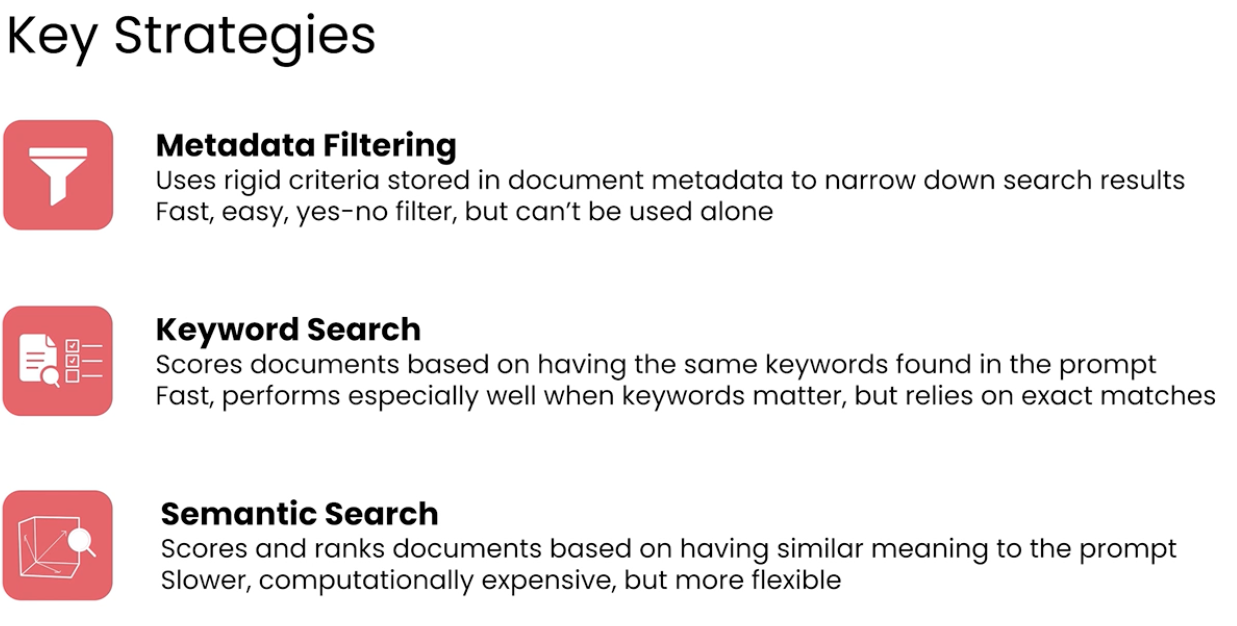

### Hybrid Search Pipeline

The retriever first performs both keyword and semantic searches, generating two ranked lists of documents.

A metadata filter is applied to remove irrelevant documents from both lists.

The two lists are combined using the Reciprocal Rank Fusion (RRF) algorithm, which scores documents based on their rankings in each list.

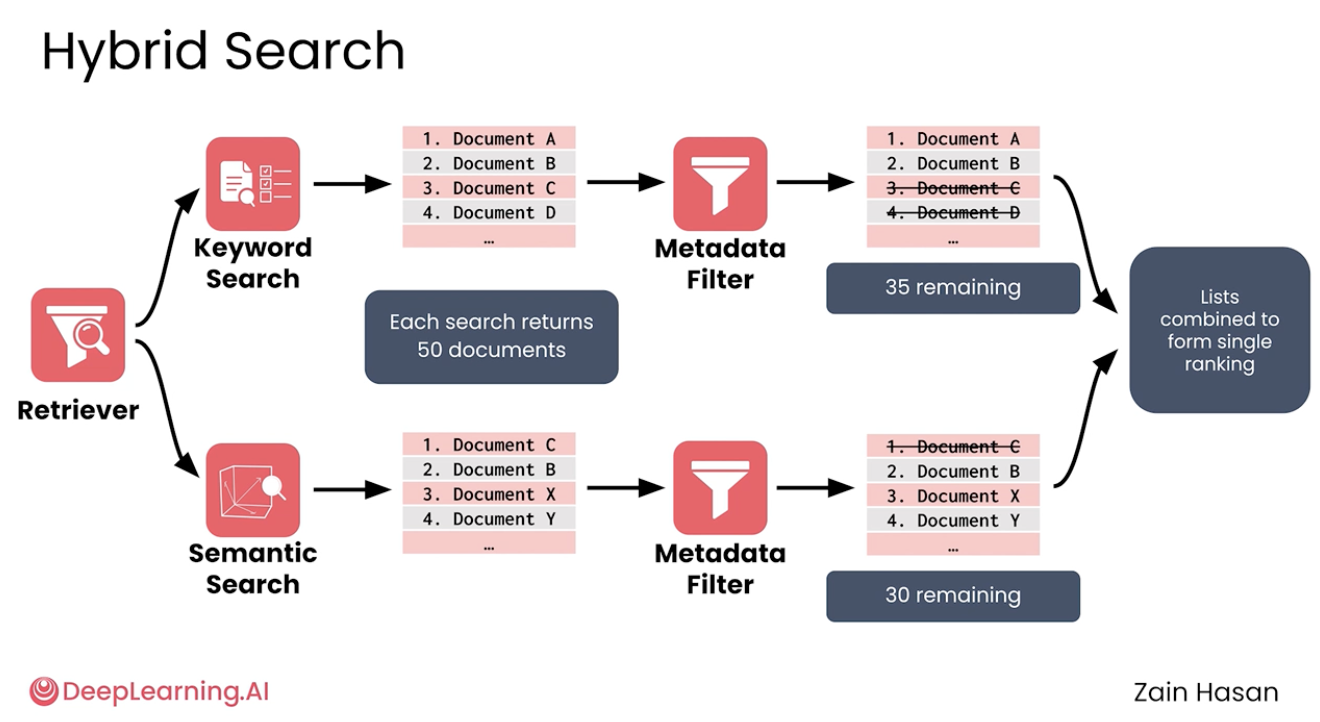